<a href="https://colab.research.google.com/github/Jjioo/TP1_cv/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Sample documents
documents = [
    "The quick brown fox",
    "Jumped over the lazy dog",
    "The lazy dog barked",
    "A brown fox is quick",
    "The dog chased the fox",
    "The fox ran away",
    "The lazy dog slept",
    "The cat and the dog",
    "The bird is in the tree",
    "Hello, world!"
]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster assignments
labels = kmeans.labels_

# Calculate adjusted Rand Index (ARI)
true_labels = np.array([0, 0, 1, 0, 1, 1, 1, 0, 1, 2])  # Assigning labels manually
ari = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Create a DataFrame to store the clusters and documents
df = pd.DataFrame({'Cluster': labels, 'Document': documents})

# Print the table without index
print(df.to_string(index=False))


Adjusted Rand Index (ARI): -0.06299212598425197
 Cluster                 Document
       2      The quick brown fox
       0 Jumped over the lazy dog
       0      The lazy dog barked
       2     A brown fox is quick
       2   The dog chased the fox
       2         The fox ran away
       0       The lazy dog slept
       0      The cat and the dog
       1  The bird is in the tree
       1            Hello, world!


Adjusted Rand Index (ARI): -0.020144819903453397


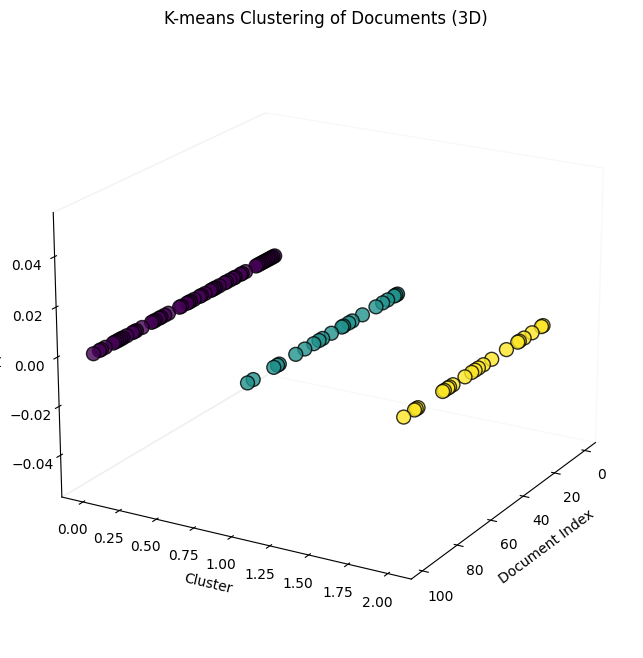

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from faker import Faker

# Generate 100 synthetic text documents
fake = Faker()
documents = [fake.text() for _ in range(100)]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster assignments
labels = kmeans.labels_

# Create a DataFrame to store the clusters and documents
df = pd.DataFrame({'Cluster': labels, 'Document': documents})

# Calculate adjusted Rand Index (ARI)
true_labels = np.array([0, 0, 1, 0, 1, 1, 1, 0, 1, 2] * 10)  # Assigning labels manually
ari = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with enhanced settings
scatter = ax.scatter(
    df.index, df['Cluster'], np.zeros_like(df.index),
    c=df['Cluster'], cmap='viridis',
    s=100, marker='o', edgecolor='black', alpha=0.8
)

# Title and labels
ax.set_title('K-means Clustering of Documents (3D)')
ax.set_xlabel('Document Index')
ax.set_ylabel('Cluster')
ax.set_zlabel('Z')

# Add grid lines
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Set viewing angle
ax.view_init(elev=20, azim=30)

# Show the plot
plt.show()
